# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [85]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns  # Plots!  

# Set the default figure size for plotting
sns.mpl.rc("figure", figsize=(18,13))
sns.set_context("notebook", font_scale=2)

%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


In [9]:
# Perform a few descriptive analytics on the dataset
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [10]:
df_raw['admit'].sum()

(127,)

In [11]:
df_raw.columns

Index([u'admit', u'gre', u'gpa', u'prestige'], dtype='object')

In [14]:
print df_raw['gre'].skew()

-0.150126665946


## Questions
#### Question 1. How many observations are in our dataset? 


In [15]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: There are 400 observations

#### Question 2. Create a summary table

In [16]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE is uniformly determined across school (each student takes the same test), while GPA is determined by each school, and a difference would give you an indication where assignments of GPA may vary (such as with grade inflation)

#### Question 4. Drop data points with missing data


In [89]:
# create new dataframe that only includes rows with complete data
df_dropna = df_raw.dropna()
df_dropna.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [29]:
#confirm the new dataframe has dropped the NaN values
df_dropna.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: The new dataframe has 397 observations vs the original that was 400

#### Question 6. Create box plots for GRE and GPA

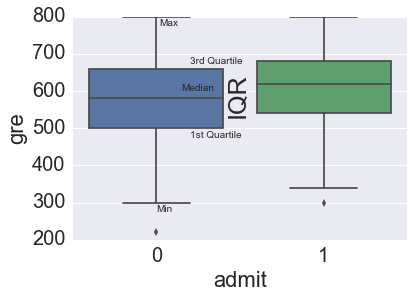

In [65]:
#boxplot gre vs 
plt = sns.boxplot("admit", "gre", data=df_dropna)
plt.text(x=0.2, y=675, s="3rd Quartile")
plt.text(x=.15, y=600, s="Median")
plt.text(x=0.2, y=475, s="1st Quartile")
plt.text(x=0, y=275, s="Min")
plt.text(x=.02, y=775, s="Max")
plt.text(x=.42, y=600, s="IQR", rotation=90, size=25);


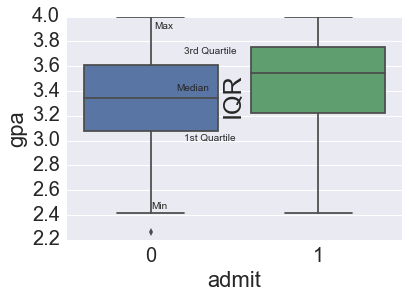

In [79]:
#boxplot 2 
plt = sns.boxplot("admit", "gpa", data=df_dropna)
plt.text(x=0.2, y=3.7, s="3rd Quartile")
plt.text(x=.15, y=3.4, s="Median")
plt.text(x=0.2, y=3, s="1st Quartile")
plt.text(x=0, y=2.45, s="Min")
plt.text(x=.02, y=3.9, s="Max")
plt.text(x=.42, y=3.4, s="IQR", rotation=90, size=25);

#### Question 7. What do these plots show?

Answer: Students admitted into the graduate program on average have both a higher GPA and GRE than those not admitted

#### Question 8. Describe each distribution 

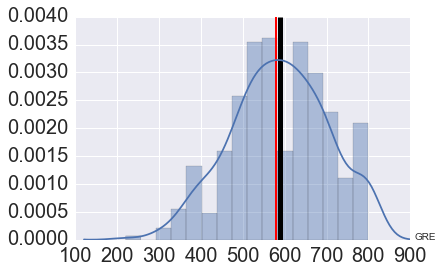

In [139]:
# plot the distribution of each variable 
plt = sns.distplot(df_dropna[['gre']])

# Plot black line at mean
plt.vlines(df_dropna[['gre']].mean(), ymin=0, ymax=0.004, linewidth=5.0)

# Plot red line at median
plt.vlines(df_dropna[['gre']].median(), ymin=0, ymax=0.004, linewidth=2.0, color="red")
plt.text(x=910, y=0, s="GRE")


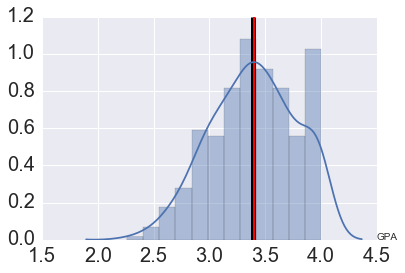

In [141]:
# plot the distribution of gpa 
plt = sns.distplot(df_dropna[['gpa']])

# Plot black line at mean
plt.vlines(df_dropna[['gpa']].mean(), ymin=0, ymax=1.2, linewidth=5.0)

# Plot red line at median
plt.vlines(df_dropna[['gpa']].median(), ymin=0, ymax=1.2, linewidth=2.0, color="red")
plt.text(x=4.5, y=0, s="GPA")


#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Yes

#### Question 10.  Does this distribution need correction? If so, why? How? 

In [142]:
#first check skew and kurtosis of GRE data
print 'GRE skew:',df_dropna[['gre']].skew()  # Check skewness
print 'GRE kurtosis',df_dropna[['gre']].kurt()

#then check skew and kurtosis of GPA data
print 'GPA skew:', df_dropna[['gpa']].skew()  # Check skewness
print 'GPA Kurtosis:', df_dropna[['gpa']].kurt()


GRE skew: gre   -0.146047
dtype: float64
GRE kurtosis gre   -0.332864
dtype: float64
GPA skew: gpa   -0.216889
dtype: float64
GPA Kurtosis: gpa   -0.56357
dtype: float64


Answer: No, the skew and kurtosis for GRE and GPA are both low and indicate few outliers
* For GRE, since the Skew is near zero and the kurtosis is low, that indicates a relatively normal distrubtion without many outliers
* For GPA, the skew is greater than GRE but still close to zero, and the kurtosis is low indicating not many outliers. 

#### Question 11. Which of our variables are potentially colinear? 

In [161]:
# create a dataFrame dictionary to create dummy variables for each level of prestige
dummy_ranks = pd.get_dummies(df_dropna['prestige'], prefix='prestige')
# create a clean data frame that combines the existing predictor data with the dummy variables

cols_to_keep = ['admit', 'gre', 'gpa']
df_ranks = df_dropna[cols_to_keep].join(dummy_ranks.ix[:, 'prestige':])

df_ranks.head()
# Since prestige is essentially a categorical variable, separate correlations by each prestige level
df_ranks.groupby('prestige_1.0')['gre', 'gpa'].corr()

gre       gpa
prestige_1.0                        
0.0          gre  1.000000  0.368094
             gpa  0.368094  1.000000
1.0          gre  1.000000  0.433515
             gpa  0.433515  1.000000

In [162]:
df_ranks.groupby('prestige_2.0')['gre', 'gpa'].corr()

gre       gpa
prestige_2.0                        
0.0          gre  1.000000  0.440847
             gpa  0.440847  1.000000
1.0          gre  1.000000  0.282753
             gpa  0.282753  1.000000

In [163]:
df_ranks.groupby('prestige_3.0')['gre', 'gpa'].corr()

gre       gpa
prestige_3.0                        
0.0          gre  1.000000  0.327638
             gpa  0.327638  1.000000
1.0          gre  1.000000  0.519390
             gpa  0.519390  1.000000

In [166]:
df_ranks.groupby('prestige_4.0').corr()

admit       gpa       gre  prestige_1.0  \
prestige_4.0                                                            
0.0          admit         1.000000  0.165271  0.180989      0.195810   
             gpa           0.165271  1.000000  0.398111      0.057141   
             gre           0.180989  0.398111  1.000000      0.084053   
             prestige_1.0  0.195810  0.057141  0.084053      1.000000   
             prestige_2.0  0.023996 -0.094066  0.040417     -0.429422   
             prestige_3.0 -0.182494  0.051053 -0.109419     -0.362333   
1.0          admit         1.000000  0.160973  0.134374           NaN   
             gpa           0.160973  1.000000  0.277405           NaN   
             gre           0.134374  0.277405  1.000000           NaN   
             prestige_1.0       NaN       NaN       NaN           NaN   
             prestige_2.0       NaN       NaN       NaN           NaN   
             prestige_3.0       NaN       NaN       NaN           NaN   

                           prestige_2.0  prestige_3.0  
prestige_4.0                                           
0.0          admit             0.023996     -0.182494  
             gpa              -0.094066      0.051053  
             gre               0.040417     -0.109419  
             prestige_1.0     -0.429422     -0.362333  
             prestige_2.0      1.000000     -0.686143  
             prestige_3.0     -0.686143      1.000000  
1.0          admit                  NaN           NaN  
             gpa                    NaN           NaN  
             gre                    NaN           NaN  
             prestige_1.0           NaN           NaN  
             prestige_2.0           NaN           NaN  
             prestige_3.0           NaN           NaN

Answer: To answer this, we need to separate prestiage, which is categorical, into it's component columns. 
None of the correlations between variables are (really that high) potentially colinear, as described by the correlation function. 

#### Question 12. What did you find?

Answer: That none of the varaiables are potentially colinear (which is surprising).

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 
* Create a data dictionary to explain the variables
* Calculate summary statistics of the dataset (mean, median, std), ie df.describe()
* Determine the distribution by examining the mean and the median and plotting the dataset
* Check for outliers and colinearity by caulcuting the correlation coefficient
* Determine if there are missing values in the dataset that need to be included, or if certain values should be excluded.

#### Question 14. What is your hypothesis? 

Answer: *Does prestiage of undergraduate institution influence admission into graduate school?*

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data